# Kaggle competition : Titanic dataset

In this notebook, we will try to detect relevant patters among the passengers whose data is stored in the file **train.csv** to build a predictive model able to determine the survivability of the passengers whose data is stored in the file **test.csv**. 

## Problem characteristics

### Environment

This problem is self-sufficient : it is not a part of a larger environment, there is a single system to elaborate to solve it. The output data from the built model is the final result in the scope of this competition.

### Scope

The goal of this problem is to determine if the passengers listed in **test.csv** survived or not during the Titanic incident.

### Solution

Given the data about passengers listed in **train.csv** we are to build a predictive models. There are only two possible outputs : either the passenger survived, or he/she did not, thus this is a **binary classification problem**. The ground truth is contained within the **train.csv** file, so the learning process will be **supervised**. Finally, the provided data is the only data we will ever be able to feed to our model, since it was obtained from the specific incident of the Titanic. In that extent, the model will be learning on **batch** database.

### Performance measurement

The competition scores are based on **accuracy**, which corresponds to the percentage of correct predictions on **test.csv** from our system.

## Download files

Installing the Kaggle API :

In [78]:
%pip install kaggle

Note: you may need to restart the kernel to use updated packages.


Checking version. If version < 1.5.0, update with pip install kaggle --upgrade

In [81]:
!kaggle --version

Kaggle API 1.5.13


In [46]:
import os
import kaggle
from kaggle.api.kaggle_api_extended import KaggleApi

"""
Creating variables for input data path and competition name
"""
INPUT_PATH = 'data'
COMPETITION = 'titanic'

"""
Function to download data into dedicated directory
"""
def fetch_input_data(competition=COMPETITION, input_path=INPUT_PATH, api=KaggleApi()):
    if not os.path.isdir(input_path):
        os.makedirs(input_path)
    api.authenticate()
    for file in api.competition_list_files(COMPETITION):
        api.competition_download_file(COMPETITION, str(file), path=INPUT_PATH)


fetch_input_data()


100%|██████████| 28.0k/28.0k [00:00<00:00, 1.59MB/s]

100%|██████████| 59.8k/59.8k [00:00<00:00, 1.85MB/s]

100%|██████████| 3.18k/3.18k [00:00<00:00, 812kB/s]

## Data vizualisation

### Checking and loading data

In [72]:
"""
Import of useful packages
"""

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

"""
Printing data files stored in the folder 'data'. These files will be the input data for our model.
"""
for dirname, _, filenames in os.walk(INPUT_PATH):
    for filename in filenames:
        print(os.path.join(dirname, filename))

data\gender_submission.csv
data\test.csv
data\train.csv


In [51]:
"""
Function loading training dataset 'train.csv'.
"""
def load_training_data(input_path = INPUT_PATH):
    csv_path = os.path.join(input_path, 'train.csv')
    return pd.read_csv(csv_path)

In [52]:
"""
Function loading test dataset 'test.csv'.
"""
def load_test_data(input_path = INPUT_PATH):
    csv_path = os.path.join(input_path, 'test.csv')
    return pd.read_csv(csv_path)

In [85]:
"""
Actual data loading 
"""
train_data = load_training_data()
test_data = load_test_data()

### First elements of data vizualisation

Display 5 first rows :

In [55]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Display short description of data :

In [57]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


This dataset contains 891 examples and 12 features. At most 204 examples have only non-null values. 3 features have null values : Age, Cabin and Embarked. There are 7 numerical features (of which 5 are integers), and 5 are strings.

Display number of categories for every non-float feature :

In [60]:
for col in train_data.select_dtypes(include=['int64', 'object']):
    print(col, train_data[col].nunique())

PassengerId 891
Survived 2
Pclass 3
Name 891
Sex 2
SibSp 7
Parch 7
Ticket 681
Cabin 147
Embarked 3


The features PassengerId, Name, Ticket and Cabin have a large number of categories. The values are either unique to each passenger (PassengerId, Name) or to each family (Ticket, Cabin). Now we will display the value counts for the remaining 6 categories :

In [63]:
print(train_data['Survived'].value_counts())

0    549
1    342
Name: Survived, dtype: int64


This feature corresponds to our label. As we mentioned in the introduction of this notebook, this is a binary feature :
 - 0: did not survive
 - 1: survived

In [64]:
print(train_data['Pclass'].value_counts())

3    491
1    216
2    184
Name: Pclass, dtype: int64


There are 3 ticket classes. The majority of them is of 3rd class.

In [69]:
print(train_data['Sex'].value_counts())

male      577
female    314
Name: Sex, dtype: int64


Gender distribution in the boat. Majority is male. This feature is probably of high importance regarding the number of surviving passengers, given the rule of "women and children first" was applied during the evacuation.

In [66]:
print(train_data['SibSp'].value_counts())

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64


Number of siblings and spouse on the boat. Most people went with no sibling/spouse, but there are some big families as well. Could be interesting to transform into a binary or ternary categorical feature.

In [67]:
print(train_data['Parch'].value_counts())

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


This feature has kind of the same distribution as the previous one. It represents the number of parents or children on the boat. Might be interesting to regroup with SibSp.

In [68]:
print(train_data['Embarked'].value_counts())

S    644
C    168
Q     77
Name: Embarked, dtype: int64


Port of embarcation. Most of passengers embarked in Southampton.

Below we examine numerical feature, by giving some statistical information :

In [70]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


 - PassengerId is simply a number from 1 to 891 given to each passenger. 
 - Survived is our target variable. From this we can see that 38.4 % of passengers survived. 
 - From Pclass we confirm that most of the passengers were in 3rd class. 
 - From Age, we can see that people are quite young on the ship. There are also probably some outliers (older people). 
 - From SibSp and Parch, we see that a vast majority of passengers went without any siblings of parents. 
 - From Fare, we can see that most of the tickets are priced under $31, but that some people paid relatively very expensive price for this trip. There should be a correlation between Fare and Pclass.

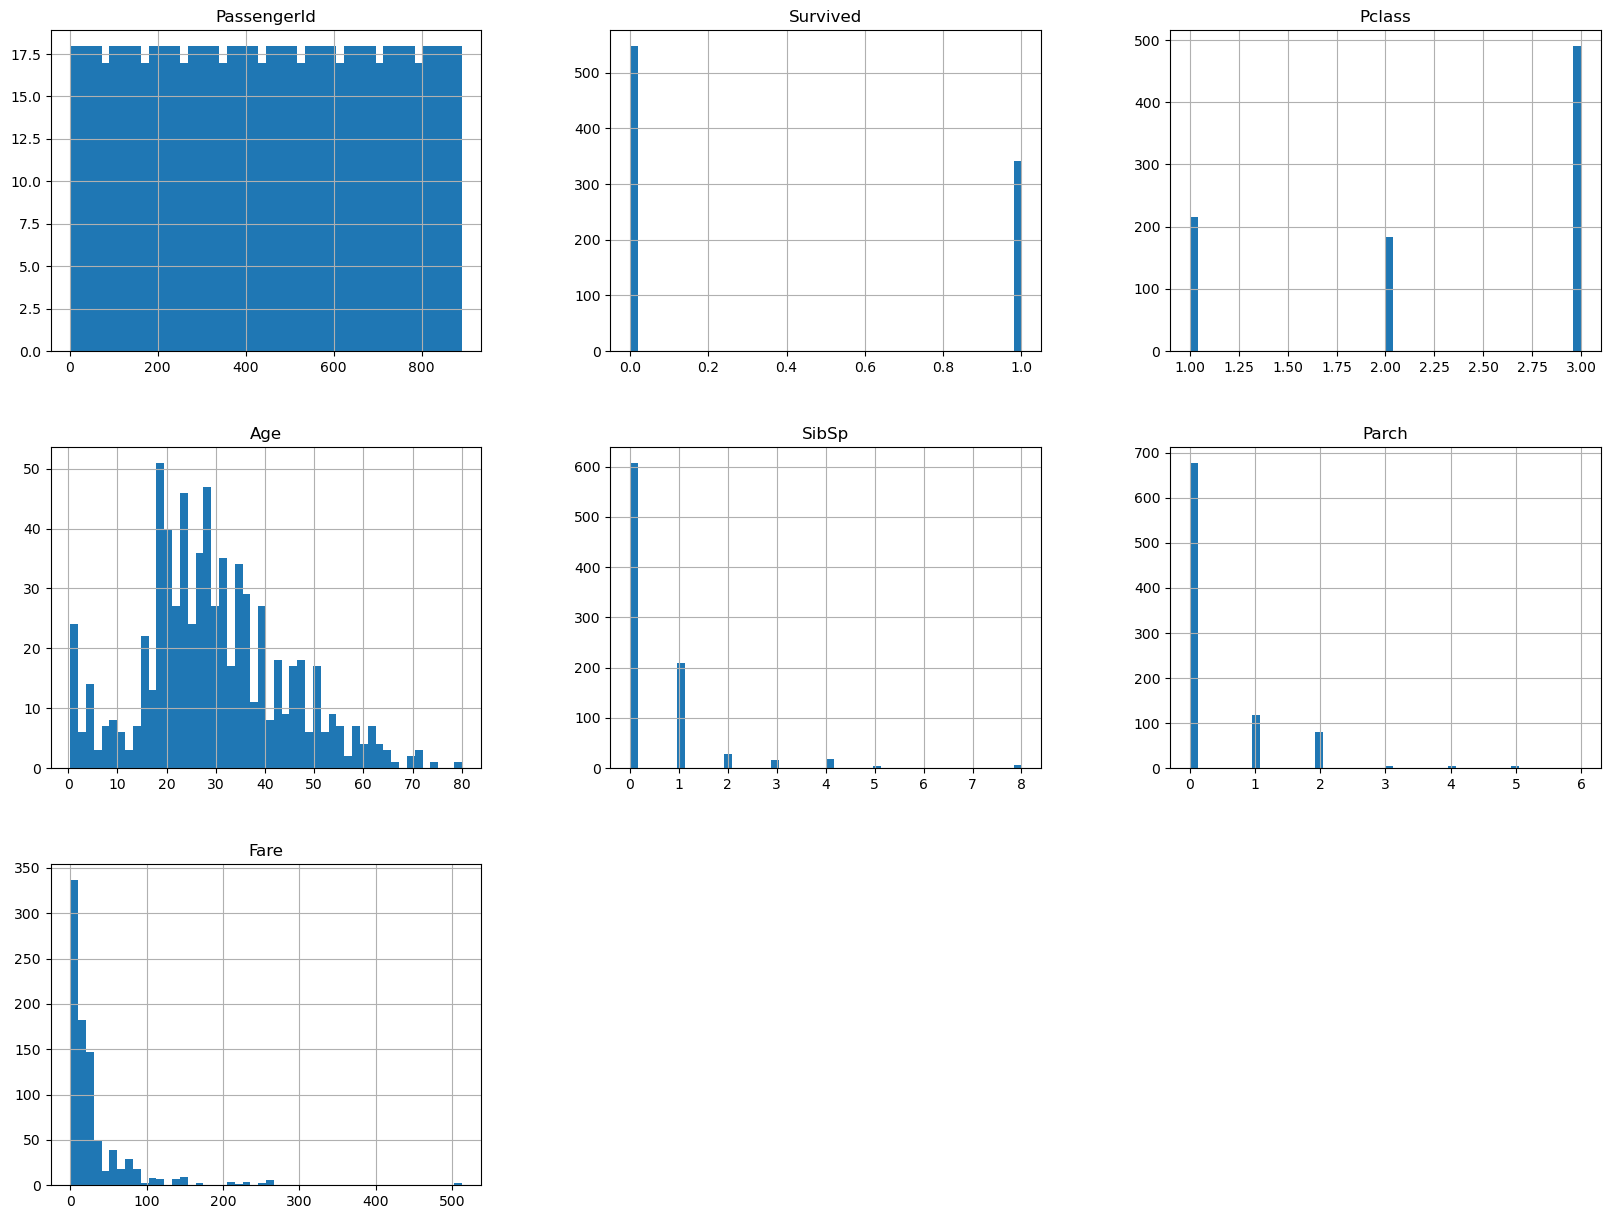

In [77]:
%matplotlib inline
import matplotlib.pyplot as plt
train_data.hist(bins=50, figsize=(20,15))
plt.show()

 - Attributes are not all on the same scale, we will have to perform standardization.
 - Histograms are mostly asymmetric and only Age could be considered as a normal distribution (although it is skewed).

## Train/test data splitting

We will now subdivide our train set into a true train set and a test set. We have seen that most feature are not evenly distributed. To ascertain that both train and test sets are representative of the whole dataset, we will use a Stratified Split.

But first, we need to change some of the features into categorical ones, such as Age and Fare. We first need to determine the best categories for them, regarding the survival rate. We will have to work on both full train set and also test set : if we add new features or transform some, we will need to do this also on the test set.

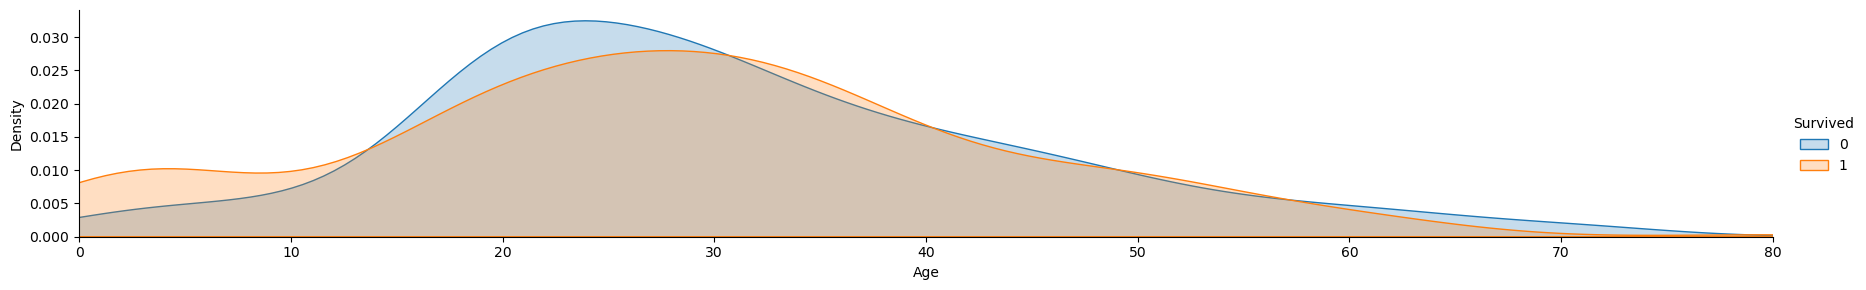

In [82]:
import seaborn as sns
a = sns.FacetGrid(train_data, hue = 'Survived', aspect = 6)
a.map(sns.kdeplot, 'Age', shade = True)
a.set(xlim=(0, train_data['Age'].max()))
a.add_legend()

We will set the categories to : 0-14 / 14-30 / 30-40 / 40-50 / 50-60 / 60-80 from 0 to 5. We will also replace the null values by the age average + some noise :

In [93]:
full_data = [train_data, test_data]
for dataset in full_data:
    age_avg = dataset['Age'].mean()
    age_std = dataset['Age'].std()
    age_null_count = dataset['Age'].isnull().sum()
    age_null_random_list = np.random.randint(
        age_avg - age_std, age_avg + age_std, size=age_null_count)
    dataset.loc[np.isnan(dataset['Age']), 'Age'] = age_null_random_list
    dataset['Age'] = dataset['Age'].astype(int)

    dataset.loc[dataset['Age'] <= 14, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 14) & (dataset['Age'] <= 30), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 30) & (dataset['Age'] <= 40), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 50), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 50) & (dataset['Age'] <= 60), 'Age'] = 2
    dataset.loc[dataset['Age'] > 60, 'Age'] = 4
train_data['Age'].value_counts()


5    432
1    215
3    102
0     78
2     42
4     22
Name: Age, dtype: int64

In [95]:
train_data[["Age", "Survived"]].groupby(['Age'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Age,Survived
0,0,0.576923
1,1,0.413953
2,2,0.404762
3,3,0.362745
5,5,0.344907
4,4,0.227273
